 # Dimensionality Reduction 


Reducing number of dimensions whcih means that the number of new features is lower than the number of original features.
First, we need to import numpy, matplotlib, and scikit-learn and get the UCI ML digit image data. Scikit-learn already comes with this data (or will automatically download it for you) so we don’t have to deal with uncompressing it ourselves! Additionally, I’ve provided a function that will produce a nice visualization of our data.

We are going to use the following libraries and packages:

* **numpy**: "NumPy is the fundamental package for scientific computing with Python." (http://www.numpy.org/)
* **matplotlib**: "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms." (https://matplotlib.org/)
* **sklearn**: Scikit-learn is a machine learning library for Python programming language. (https://scikit-learn.org/stable/)
* **pandas**: "Pandas provides easy-to-use data structures and data analysis tools for Python." (https://pandas.pydata.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 
import pandas as pd


# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is an algorithm to optimally map the higher dimensional space to lower dimensions paying attention to short distances. The trasformation is different for different regions. SNE is the general concept behind this type of mapping and "t" shows usage of t-distribution in t-SNE. 

## Synthetic data 

Let's generate synthetic data as follows:
1) Points are scattered in 2 dimensional space as follows. There are N-2 other dimensions that all the points have same values in each dimension
2) We will reduce the dimensionality of the data to 2D


Text(0, 0.5, '2nd dimension')

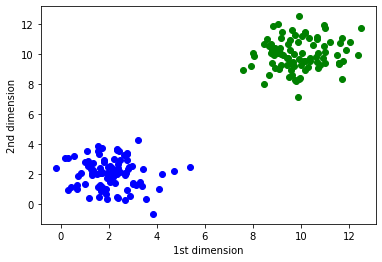

In [2]:
group_1_X = np.repeat(2,90)+np.random.normal(loc=0, scale=1,size=90)
group_1_Y = np.repeat(2,90)+np.random.normal(loc=0, scale=1,size=90)

group_2_X = np.repeat(10,90)+np.random.normal(loc=0, scale=1,size=90)
group_2_Y = np.repeat(10,90)+np.random.normal(loc=0, scale=1,size=90)

plt.scatter(group_1_X,group_1_Y, c='blue')
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

### Implementing t-SNE on the synthetic data

(180, 2)


Text(0.5, 1.0, 'UMAP')

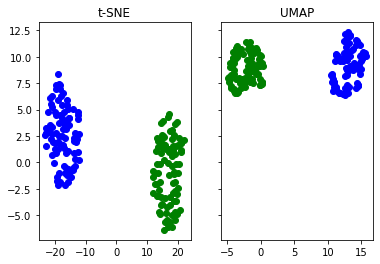

In [3]:
####
combined = np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y])))
print(combined.shape)
####
from sklearn import manifold
combined_tSNE = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(combined)
####
import umap
combined_UMAP = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2,random_state=2).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_tSNE[0:90,0], combined_tSNE[0:90,1], c='blue')
ax1.scatter(combined_tSNE[90:180,0], combined_tSNE[90:180,1], c='green')
ax1.set_title('t-SNE')

ax2.scatter(combined_UMAP[0:90,0], combined_UMAP[0:90,1], c='blue')
ax2.scatter(combined_UMAP[90:180,0], combined_UMAP[90:180,1], c='green')
ax2.set_title('UMAP')

**Parameters of t-SNE:**

* ***Perplexity (perplexity)***: somehow shows the number of close neighbors each point has. Hence, perplexity should be smaller than the number of points. There is a suggested range for perplexity in the original paper: "The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.". Although perplexity=5 is usually not optimal, values higher than 50 also may result in weird grouping of the data points and shapes in 2 dimensional space. 

* ***Number of iterations (n_iter)*** required for converagence of the approach is another important parameter that depened on the input dataset. There are no fixed number to make sure of the convergence but there are some rule of thumb to check that. As an example, if there are pinched shapes in the t-SNE plot, it is better to run the approach for higher iteration number to makes sure that the resulted shapes and clusters are not artifacts of an unconverged t-SNE.

**Parameters of UMAP:**

*  ***Number of neighbors (n_neighbors)***: Number of neighboring data points used in the process of local manifold approximation. This parameters is suggested to be between 5 and 50.
*  ***Minimum distance (min_dist)***: It is a measure of allowed compression of points together in low dimensional space. This parameters is suggested to be between 0.001 and 0.5.


### Let's change the structure of synthetic data

Let's generate synthetic data as follows:

Text(0, 0.5, '2nd dimension')

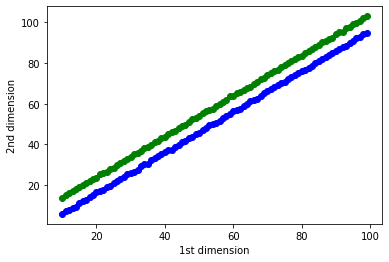

In [4]:
group_1_X = np.arange(10,100)
group_1_Y = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)-np.repeat(4,90)

group_2_X = np.arange(10,100)
group_2_Y = np.arange(10,100)+np.random.normal(loc=0, scale=0.3,size=90)+np.repeat(4,90)

plt.scatter(group_1_X,group_1_Y, c='blue')
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

### Implementing t-SNE and UMAP on the synthetic data




(180, 2)


Text(0.5, 1.0, 'UMAP')

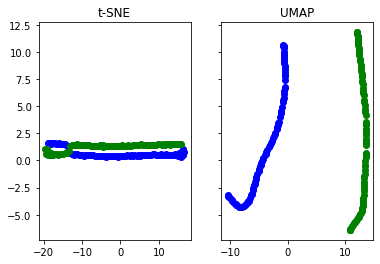

In [5]:
####
combined = np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y])))
print(combined.shape)
####
from sklearn import manifold
combined_tSNE = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(combined)
####
import umap
combined_UMAP = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=2,random_state=2).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_tSNE[0:90,0], combined_tSNE[0:90,1], c='blue')
ax1.scatter(combined_tSNE[90:180,0], combined_tSNE[90:180,1], c='green')
ax1.set_title('t-SNE')

ax2.scatter(combined_UMAP[0:90,0], combined_UMAP[0:90,1], c='blue')
ax2.scatter(combined_UMAP[90:180,0], combined_UMAP[90:180,1], c='green')
ax2.set_title('UMAP')

### Another synthetic data

Let's generate synthetic data as follows:


(0.0, 2.5)

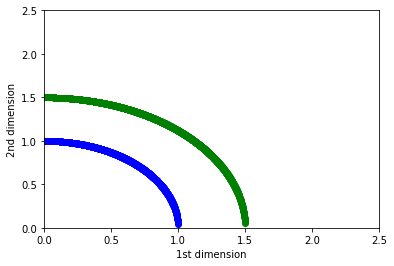

In [6]:
group_1_X = np.arange(start=0,stop=1**2,step=0.001)
group_1_Y = np.sqrt(np.repeat(1**2,1000)-group_1_X**2)

group_2_X = np.arange(start=0,stop=1.5,step=0.001)
group_2_Y = np.sqrt(np.repeat(1.5**2,1500)-group_2_X**2)

plt.scatter(group_1_X,group_1_Y, c='blue', )
plt.scatter(group_2_X,group_2_Y,c='green')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.xlim(0,2.5)
plt.ylim(0,2.5)

### Implementing t-SNE on the synthetic data

(2500, 2)


Text(0.5, 1.0, 'UMAP')

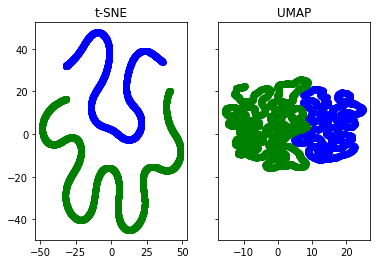

In [7]:
####
combined = np.column_stack((np.concatenate([group_1_X,group_2_X]),np.concatenate([group_1_Y,group_2_Y])))
print(combined.shape)
####
from sklearn import manifold
combined_tSNE = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(combined)
####
import umap
combined_UMAP = umap.UMAP(n_neighbors=10, min_dist=0.9, n_components=2,random_state=2).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_tSNE[0:1000,0], combined_tSNE[0:1000,1], c='blue')
ax1.scatter(combined_tSNE[1000:2500,0], combined_tSNE[1000:2500,1], c='green')
ax1.set_title('t-SNE')

ax2.scatter(combined_UMAP[0:1000,0], combined_UMAP[0:1000,1], c='blue')
ax2.scatter(combined_UMAP[1000:2500,0], combined_UMAP[1000:2500,1], c='green')
ax2.set_title('UMAP')

### UCI ML digit image data

* load and return digit data set

In [8]:
from sklearn import datasets

# Loading digit images
digits = datasets.load_digits()

X = digits.data
y = digits.target
n_samples, n_features = X.shape
print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 1797
number of features: 64


Pixels of images have values between 0 and 16:

In [9]:
np.max(X)

16.0

Let's write a function to use it for visualization of the results of all the dimension reduction methods.

#### Let's visualize some of the images

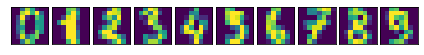

In [10]:
fig, ax_array = plt.subplots(1,10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i])
plt.setp(axes, xticks=[], yticks=[])
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Now that we understood how t-SNE works, let's implement it on the UCI ML digit image data:

In [11]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(X)

Now, we use the plotting function to show the first 2 principle component scores of all teh data points.

In [12]:
def embedding_plot(X,labels,title):
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension', fontsize=24)
  plt.ylabel('2nd dimension', fontsize=24)
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.grid(False)
  plt.title(title, fontsize=24);

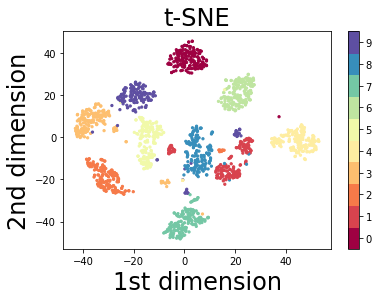

In [13]:
embedding_plot(X_tsne, y,"t-SNE")

**t-SNE is an unsupervised approach similar to PCA and ICA. We add color for the sample labels afterward.**

## Normalizing data before dimensionality reduction

It is a good idea usually to normalize the data so that the scale of values for different features would become similar. 

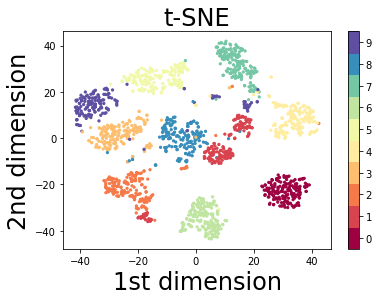

In [14]:
from sklearn import preprocessing
X_norm = pd.DataFrame(preprocessing.scale(X)) 

Xnorm_tsne = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(X_norm)

embedding_plot(Xnorm_tsne, y,"t-SNE")

# Uniform Manifold Approximation and Projection (UMAP)

UMAP is a manifold learning method that is comptetitive to t-SNE for visualization quality while preserving the global structure of data, unlike t-SNE. UMAP has no computational restriction and is scalable to extremely large dataset, like GoogleNews, unlike t-SNE.

UMAP uses k-nearest neighbor and uses Stochastic Gradient Descent to minimize the difference between the distances in the high dimensional and low dimensional spaces.


**Definitions**

* A n-dimensional manifold (n-manifold) M is a topological space that is locally homeomorphic to the Euclidean space of dimension n.
* Locally homeomorphic means that every point in the space M is contained in an open set U such that there is a one-to-one onto map f:U -> M.
* One-to-one onto map f:U -> M means that each element of M is mapped by exactly one element of U.
* A topological space is a collection of open sets (with some mathematical properties).
* A Riemannian (smooth) manifold M is a real smooth manifold with an inner product that varies smoothly from point to point in the tangent space of M.
* Riemannian metric is collection of all the inner products of the points in the manifold M on the tangent space of M.

* A simplicial complex K in n-dimensional real space is a collection of simplices in the space such that 1) Every face of a simplex of K is in K, and 2) The intersection of any two simplices of K is a face of each of them (Munkres 1993, p. 7; http://mathworld.wolfram.com/).
* A simplex is the generalization of a tetrahedral region of space to n dimensions(http://mathworld.wolfram.com/).

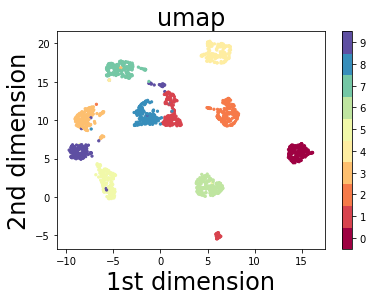

In [15]:
import umap

X_umap = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2, random_state=2).fit_transform(X)
embedding_plot(X_umap, y,"umap")

## Boston housing dataset

In [16]:
from sklearn import datasets

# Loading digit images
housing = datasets.load_boston()

Xhouse = pd.DataFrame(housing.data)
Xhouse.columns = housing.feature_names

yhouse = housing.target
n_samples, n_features = Xhouse.shape

print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 506
number of features: 13


### Normalizing the data

In [17]:
from sklearn import preprocessing
Xhouse_norm = pd.DataFrame(preprocessing.scale(Xhouse), columns=Xhouse.columns) 

## Implementing t-SNE on the California housing data

In [18]:
Xhousenorm_tSNE = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(Xhouse_norm)
Xhousenorm_tSNE.shape

(506, 2)

### Visualizing the results of t-SNE implemented on the California housing dataset

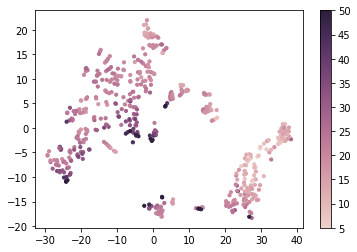

In [19]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots()
points = ax.scatter(x=Xhousenorm_tSNE[:,0], y=Xhousenorm_tSNE[:,1], c=yhouse, s=10, cmap=cmap)
fig.colorbar(points)

## Implementing UMAP on the Boston housing data

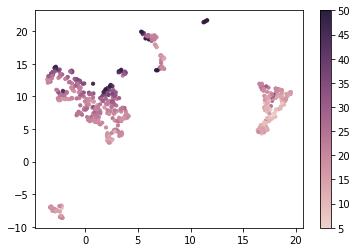

In [20]:
Xhousenorm_umap = umap.UMAP(n_neighbors=10, min_dist=0.4, n_components=2, random_state=2).fit_transform(Xhouse_norm)

fig, ax = plt.subplots()
points = ax.scatter(x=Xhousenorm_umap[:,0], y=Xhousenorm_umap[:,1], c=yhouse, s=10, cmap=cmap)
fig.colorbar(points)

### Removing outliers and repeating the analysis

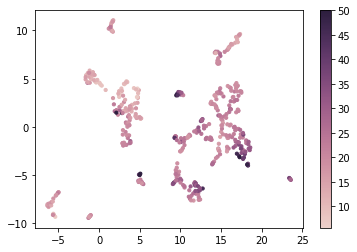

In [21]:
Xhouse_norm_noout = Xhouse_norm.iloc[np.where((Xhouse_norm.max(axis=1) < 3)==True)[0],:]

Xhousenorm_noout_umap = umap.UMAP(n_neighbors=5, min_dist=0.4, n_components=2, random_state=2).fit_transform(Xhouse_norm_noout)

fig, ax = plt.subplots()
points = ax.scatter(x=Xhousenorm_noout_umap[:,0], y=Xhousenorm_noout_umap[:,1], c=yhouse[np.where((Xhouse_norm.max(axis=1) < 3)==True)[0]], s=10, cmap=cmap)
fig.colorbar(points)